In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('../../Downloads/acs2015_county_data.csv')

In [3]:
df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

* We will predict Unemployment rate
* CensusId, State, County should be dropped since represent an ID
* TotalPop, Gender, Citizen should be normalized
* Finally, I will consider all the columns from TotalPop until MeanCommute

In [6]:
df1=df.loc[:, 'TotalPop':'MeanCommute'].copy()

In [7]:
df1['Unemployment']=df.Unemployment

In [8]:
df1.isna().sum()

TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Unemployment       0
dtype: int64

To simplify the project I will drop na. In ideal case I need to fix it.

In [9]:
df1.dropna(inplace=True)

In [10]:
df1.shape

(3218, 29)

In [13]:
df1.Women=df1.eval('Women/TotalPop')

In [14]:
df1.drop('Men', axis=1, inplace=True)

In [16]:
df1.Citizen=df1.eval('Citizen/TotalPop')

In [17]:
df1.head()

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
0,55221,0.515673,2.6,75.8,18.5,0.4,1.0,0.0,0.737491,51281.0,...,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,7.6
1,195121,0.511513,4.5,83.1,9.5,0.6,0.7,0.0,0.756941,50254.0,...,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,7.5
2,26932,0.461718,4.6,46.2,46.7,0.2,0.4,0.0,0.769122,32964.0,...,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,17.6
3,22604,0.465891,2.2,74.5,21.4,0.4,0.1,0.0,0.773978,38678.0,...,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8.3
4,57710,0.505944,8.6,87.9,1.5,0.3,0.1,0.0,0.733755,45813.0,...,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,7.7


In [19]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalPop,3218.0,99471.066501,319395.089893,267.000000,11225.250000,26079.500000,66457.500000,1.003839e+07
Women,3218.0,0.499903,0.023886,0.267775,0.495354,0.504656,0.511789,5.942101e-01
Hispanic,3218.0,11.006029,19.242390,0.000000,1.900000,3.900000,9.800000,9.990000e+01
White,3218.0,75.451243,22.922274,0.000000,64.100000,84.100000,93.200000,9.980000e+01
Black,3218.0,8.670883,14.281924,0.000000,0.500000,1.900000,9.600000,8.590000e+01
Native,3218.0,1.720603,7.252676,0.000000,0.100000,0.300000,0.600000,9.210000e+01
Asian,3218.0,1.223244,2.610159,0.000000,0.200000,0.500000,1.200000,4.160000e+01
Pacific,3218.0,0.071815,0.393455,0.000000,0.000000,0.000000,0.000000,1.110000e+01
Citizen,3218.0,0.747194,0.052651,0.442472,0.729423,0.757548,0.778628,9.195089e-01
Income,3218.0,46123.616532,12908.429676,10499.000000,38191.250000,44748.500000,52059.000000,1.234530e+05


<AxesSubplot:>

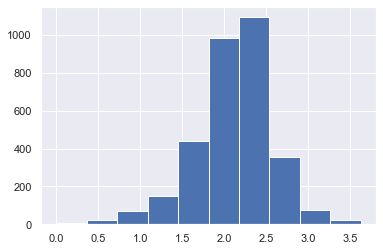

In [22]:
(df1.Unemployment+1).map(np.log).hist()

<AxesSubplot:>

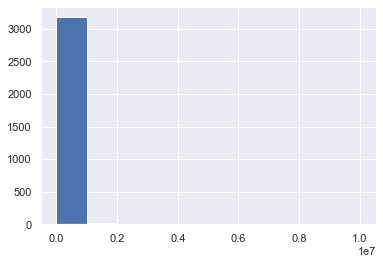

In [23]:
df1.TotalPop.hist()

In [25]:
df1.TotalPop=df1.TotalPop.map(np.log)

<AxesSubplot:>

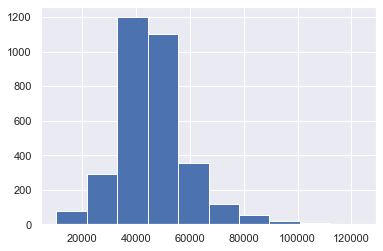

In [27]:
df1.Income.hist()

<AxesSubplot:>

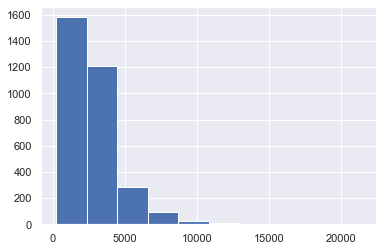

In [28]:
df1.IncomeErr.hist()

<AxesSubplot:>

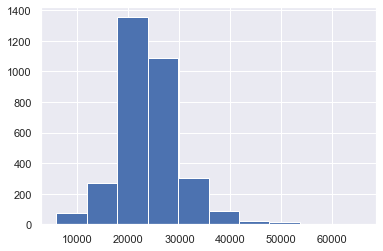

In [29]:
df1.IncomePerCap.hist()

<AxesSubplot:>

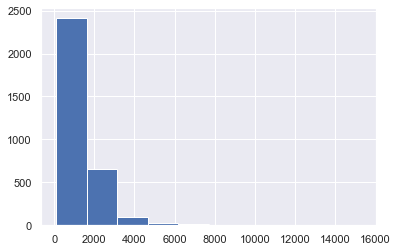

In [30]:
df1.IncomePerCapErr.hist()

I will keep all columns related to Income to be able to see if a certain Feature Selection Algorithm can handle the Multicollinearity issue (will select only 1 out of them). 

But since those features are not aligned with others (in terms of scale), I will Normalize them using StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()
df1.loc[:, 'Income':'IncomePerCapErr']=scaler.fit_transform(df1.loc[:, 'Income':'IncomePerCapErr'])

In [35]:
df1.loc[:, 'Income':'IncomePerCapErr'].describe().round()

,Income,IncomeErr,IncomePerCap,IncomePerCapErr
count,3218.0,3218.0,3218.0,3218.0
mean,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0
min,-3.0,-1.0,-3.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0
75%,0.0,0.0,0.0,0.0
max,6.0,10.0,7.0,13.0


In [36]:
df1

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
0,10.919099,0.515673,2.6,75.8,18.5,0.4,1.0,0.0,0.737491,0.399598,...,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,7.6
1,12.181375,0.511513,4.5,83.1,9.5,0.6,0.7,0.0,0.756941,0.320025,...,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,7.5
2,10.201070,0.461718,4.6,46.2,46.7,0.2,0.4,0.0,0.769122,-1.019618,...,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,17.6
3,10.025882,0.465891,2.2,74.5,21.4,0.4,0.1,0.0,0.773978,-0.576892,...,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8.3
4,10.963186,0.505944,8.6,87.9,1.5,0.3,0.1,0.0,0.733755,-0.024067,...,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,10.948312,0.518467,96.4,3.4,0.1,0.0,0.0,0.0,0.767808,-2.260550,...,9.2,14.3,89.1,7.1,0.9,1.2,1.3,0.3,32.0,15.2
3216,9.119321,0.497809,96.7,2.9,0.0,0.0,0.0,0.0,0.776013,-2.170982,...,15.7,9.1,69.1,17.8,1.0,10.8,0.0,1.4,14.0,12.2
3217,10.113951,0.510391,99.7,0.0,0.0,0.0,0.0,0.0,0.747742,-2.193142,...,13.9,19.7,82.0,11.4,0.1,3.2,0.0,3.3,26.9,25.9
3218,10.498994,0.513548,99.8,0.2,0.0,0.0,0.1,0.0,0.769701,-2.362902,...,12.8,14.7,86.0,7.9,0.0,2.3,2.3,1.5,29.5,24.3


# Feature Selection

## Filters

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression

In [39]:
X=df1.drop('Unemployment', axis=1).copy()

In [41]:
y=df1.Unemployment

In [44]:
selection=SelectKBest(f_regression, k=6)
X_new=selection.fit_transform(X,y)

In [46]:
pd.DataFrame(X_new)

,0,1,2,3,4,5
0,75.8,0.399598,0.161477,12.9,18.6,17.0
1,83.1,0.320025,0.539857,13.4,19.2,17.7
2,46.2,-1.019618,-1.154696,26.7,45.3,16.1
3,74.5,-0.576892,-0.895176,16.8,27.9,17.9
4,87.9,-0.024067,-0.555878,16.7,27.2,14.1
...,...,...,...,...,...,...
3213,3.4,-2.260550,-2.401750,48.5,56.1,21.6
3214,2.9,-2.170982,-2.447130,39.1,58.1,38.2
3215,0.0,-2.193142,-2.511889,54.0,68.3,21.0
3216,0.2,-2.362902,-2.586176,52.3,62.1,25.9


In [48]:
selection.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [49]:
X.columns[selection.get_support()]

Index(['White', 'Income', 'IncomePerCap', 'Poverty', 'ChildPoverty',
       'Service'],
      dtype='object')

In [55]:
df1.corr().Unemployment.abs().sort_values()

Citizen            0.005613
Pacific            0.015888
Transit            0.030784
Asian              0.055315
Production         0.079907
Walk               0.080272
Carpool            0.088236
Construction       0.091779
Drive              0.096529
Women              0.105154
OtherTransp        0.117109
TotalPop           0.157368
Office             0.161331
Native             0.187386
IncomeErr          0.226349
IncomePerCapErr    0.251561
MeanCommute        0.292585
Professional       0.300318
WorkAtHome         0.309747
Hispanic           0.321536
Black              0.352943
Service            0.365371
Income             0.509054
White              0.540146
IncomePerCap       0.547239
ChildPoverty       0.678441
Poverty            0.712419
Unemployment       1.000000
Name: Unemployment, dtype: float64

In [57]:
from statsmodels.api import OLS, add_constant

In [58]:
OLS(y, add_constant(X[X.columns[selection.get_support()]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     619.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:09:01   Log-Likelihood:                -7863.2
No. Observations:                3218   AIC:                         1.574e+04
Df Residuals:                    3211   BIC:                         1.578e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5467      0.514      4.954      0.000       1.539       3.555
White           -0.0218      0.003     -7.108      0.000      -0.028      -0.016
Income           0.7534      0.125      6.046      0.000       0.509       0.998
IncomePerCap    -0.6790      0.112     -6.047      0.000      -0.899      -0.459
Poverty          0.2509      0.019     13.354      0.000       0.214       0.288
ChildPoverty     0.0402      0.012      3.349      0.001       0.017       0.064
Service          0.0999      0.015      6.628      0.000       0.070       0.129
==============================================================================
Omnibus:                      248.138   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1394.631
Skew:                          -0.011   Prob(JB):                    1.44e-303
Kurtosis:                       6.225   Cond. No.                         897.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Wrappers

In [59]:
!pip install mlxtend

In [60]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [61]:
from sklearn.linear_model import LinearRegression

In [68]:
estimator=LinearRegression()
rfe=RFE(estimator, 6)
rfe.fit(X,y)

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=6)

In [69]:
rfe.ranking_

array([ 1,  1, 17, 20, 16, 14, 18, 21,  1,  1,  7,  1, 22,  1, 19,  6,  2,
        3,  5,  4,  9, 12, 11,  8, 15, 10, 13])

In [70]:
rfe.support_

array([ True,  True, False, False, False, False, False, False,  True,
        True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [71]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('TotalPop', True, 1),
 ('Women', True, 1),
 ('Hispanic', False, 17),
 ('White', False, 20),
 ('Black', False, 16),
 ('Native', False, 14),
 ('Asian', False, 18),
 ('Pacific', False, 21),
 ('Citizen', True, 1),
 ('Income', True, 1),
 ('IncomeErr', False, 7),
 ('IncomePerCap', True, 1),
 ('IncomePerCapErr', False, 22),
 ('Poverty', True, 1),
 ('ChildPoverty', False, 19),
 ('Professional', False, 6),
 ('Service', False, 2),
 ('Office', False, 3),
 ('Construction', False, 5),
 ('Production', False, 4),
 ('Drive', False, 9),
 ('Carpool', False, 12),
 ('Transit', False, 11),
 ('Walk', False, 8),
 ('OtherTransp', False, 15),
 ('WorkAtHome', False, 10),
 ('MeanCommute', False, 13)]

In [72]:
X.columns[rfe.support_]

Index(['TotalPop', 'Women', 'Citizen', 'Income', 'IncomePerCap', 'Poverty'], dtype='object')

In [73]:
OLS(y, add_constant(X[X.columns[rfe.support_]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     682.0
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:19:26   Log-Likelihood:                -7778.6
No. Observations:                3218   AIC:                         1.557e+04
Df Residuals:                    3211   BIC:                         1.561e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.7261      1.408     -8.329      0.000     -14.486      -8.966
TotalPop         0.5931      0.038     15.485      0.000       0.518       0.668
Women            3.4921      2.189      1.595      0.111      -0.800       7.784
Citizen          8.2414      1.054      7.819      0.000       6.175      10.308
Income           0.8936      0.135      6.607      0.000       0.628       1.159
IncomePerCap    -1.1487      0.121     -9.482      0.000      -1.386      -0.911
Poverty          0.3329      0.010     33.039      0.000       0.313       0.353
==============================================================================
Omnibus:                      412.457   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2267.449
Skew:                           0.480   Prob(JB):                         0.00
Kurtosis:                       6.999   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
estimator=LinearRegression()
sfs1=sfs(
    estimator,
    k_features=6,
    forward=True,
    floating=True,
    scoring='neg_mean_squared_error' #default is R2
        )

In [75]:
sfs1.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          k_features=6, scoring='neg_mean_squared_error')

In [76]:
sfs1.get_metric_dict()

{1: {'feature_idx': (13,),
  'cv_scores': array([-10.35341613,  -4.78443041,  -8.1074134 ,  -7.84937545,
         -11.27085145]),
  'avg_score': -8.473097368177346,
  'feature_names': ('Poverty',),
  'ci_bound': 2.9021427386308423,
  'std_dev': 2.2579656459821122,
  'std_err': 1.1289828229910561},
 2: {'feature_idx': (13, 26),
  'cv_scores': array([-10.47789731,  -4.09158143,  -6.76609492,  -6.74949217,
         -10.42898392]),
  'avg_score': -7.702809947917257,
  'feature_names': ('Poverty', 'MeanCommute'),
  'ci_bound': 3.1462260205167207,
  'std_dev': 2.4478707316006414,
  'std_err': 1.2239353658003205},
 3: {'feature_idx': (0, 13, 26),
  'cv_scores': array([-10.2096    ,  -3.82415213,  -6.16784412,  -6.24239697,
         -10.58932772]),
  'avg_score': -7.406664187313519,
  'feature_names': ('TotalPop', 'Poverty', 'MeanCommute'),
  'ci_bound': 3.337323260020324,
  'std_dev': 2.5965508761357503,
  'std_err': 1.2982754380678752},
 4: {'feature_idx': (0, 5, 13, 26),
  'cv_scores': arra

In [83]:
estimator=LinearRegression()
sfs2=sfs(
    estimator,
    k_features=6,
    forward=False,
    floating=True,
    scoring='neg_mean_squared_error',#default is R2
        )

In [84]:
sfs2.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          forward=False, k_features=6,
                          scoring='neg_mean_squared_error')

In [85]:
sfs2.get_metric_dict()

{27: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26),
  'cv_scores': array([ -8.91379168,  -3.54375275,  -5.47769888,  -6.09255049,
         -10.36283095]),
  'avg_score': -6.878124948123893,
  'feature_names': ('TotalPop',
   'Women',
   'Hispanic',
   'White',
   'Black',
   'Native',
   'Asian',
   'Pacific',
   'Citizen',
   'Income',
   'IncomeErr',
   'IncomePerCap',
   'IncomePerCapErr',
   'Poverty',
   'ChildPoverty',
   'Professional',
   'Service',
   'Office',
   'Construction',
   'Production',
   'Drive',
   'Carpool',
   'Transit',
   'Walk',
   'OtherTransp',
   'WorkAtHome',
   'MeanCommute'),
  'ci_bound': 3.147439616818344,
  'std_dev': 2.448814950753159,
  'std_err': 1.2244074753765795},
 26: {'feature_idx': (0,
   1,
   2,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
  

In [86]:
('TotalPop',
   'Native',
   'Citizen',
   'Poverty',
   'Professional',
   'MeanCommute'),

(('TotalPop', 'Native', 'Citizen', 'Poverty', 'Professional', 'MeanCommute'),)

In [90]:
X[list(sfs2.k_feature_names_)]

,TotalPop,Native,Citizen,Poverty,Professional,MeanCommute
0,10.919099,0.4,0.737491,12.9,33.2,26.5
1,12.181375,0.6,0.756941,13.4,33.1,26.4
2,10.201070,0.2,0.769122,26.7,26.8,24.1
3,10.025882,0.4,0.773978,16.8,21.5,28.8
4,10.963186,0.3,0.733755,16.7,28.5,34.9
...,...,...,...,...,...,...
3215,10.948312,0.0,0.767808,48.5,30.1,32.0
3216,9.119321,0.0,0.776013,39.1,18.4,14.0
3217,10.113951,0.0,0.747742,54.0,23.6,26.9
3218,10.498994,0.0,0.769701,52.3,25.9,29.5


In [92]:
sfs2.k_score_

-6.7929765084182945

In [94]:
OLS(y, add_constant(X[list(sfs2.k_feature_names_)])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     836.3
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:37:52   Log-Likelihood:                -7586.6
No. Observations:                3218   AIC:                         1.519e+04
Df Residuals:                    3211   BIC:                         1.523e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.5905      0.847    -10.139      0.000     -10.252      -6.929
TotalPop         0.5724      0.035     16.219      0.000       0.503       0.642
Native           0.0989      0.007     14.892      0.000       0.086       0.112
Citizen          5.8198      0.910      6.395      0.000       4.035       7.604
Poverty          0.3119      0.006     52.541      0.000       0.300       0.324
Professional    -0.0787      0.008     -9.866      0.000      -0.094      -0.063
MeanCommute      0.1404      0.009     16.057      0.000       0.123       0.158
==============================================================================
Omnibus:                      444.928   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2662.520
Skew:                           0.506   Prob(JB):                         0.00
Kurtosis:                       7.340   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Embedded

In [95]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [96]:
reg1=LassoCV()
reg1.fit(X,y)

LassoCV()

In [97]:
reg1.alpha_

0.09493082767478578

<AxesSubplot:>

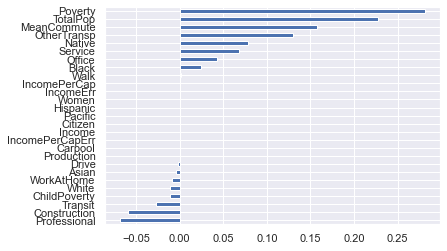

In [103]:
pd.Series(reg1.coef_, index=X.columns).sort_values().plot.barh()

In [106]:
reg1.score(X,y)

0.6286489852754827

0.1


<AxesSubplot:>

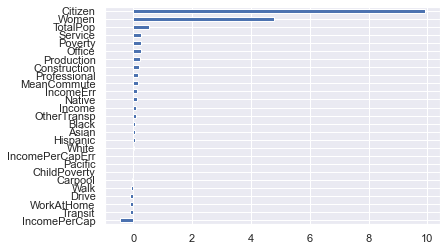

In [108]:
reg2=RidgeCV()
reg2.fit(X,y)
print(reg2.alpha_)
pd.Series(reg2.coef_, index=X.columns).sort_values().plot.barh()

In [116]:
reg2.score(X,y)

0.638134696401828

0.1651319853756512


<AxesSubplot:>

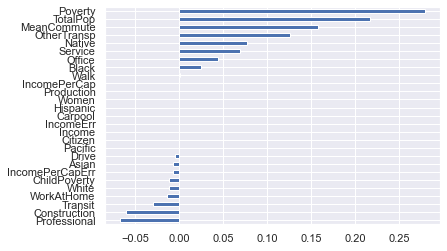

In [111]:
reg3=ElasticNetCV()
reg3.fit(X,y)
print(reg3.alpha_)
pd.Series(reg3.coef_, index=X.columns).sort_values().plot.barh()

In [112]:
reg3.score(X,y)

0.6287293785488146